# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds3001f25/eda_assignment.git`
### Do Q1, Q2, and Q3.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range? 
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

Attached in a separate file in the repo

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  

In [4]:
!pip install numpy pandas matplotlib seaborn

  Using cached matplotlib-3.10.6-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.2-cp313-cp313-macosx_10_13_universal2.whl.metadata (109 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-11.3.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.6-cp313-cp313-macosx_11_0_arm64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp313-cp313-macosx_11_0_arm64.whl (274 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.59.2-cp313-cp313-macosx_10_13_universal2.whl (2.8 MB)
Using cached kiwisolver-1.4.9-cp313-cp313-macosx_11_0_arm64.whl (64 kB)
Using cached pillow-11.3.0-cp313-cp313-macosx_11_0_arm64.whl (4.7 MB)
Using cached pyparsing-3.2.3

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/Users/calebkim7/eda_assignment/data/airbnb_hw.csv')


2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.

In [6]:
print(f"Dimension of the data: {df.shape}")
print(f"Number of observations: {df.shape[0]}")
print("Variables that are included:")
print(df.columns.tolist())

print(df.head())

Dimension of the data: (30478, 13)
Number of observations: 30478
Variables that are included:
['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type', 'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds', 'Number of Records', 'Number Of Reviews', 'Price', 'Review Scores Rating']
    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room  11206.0   1.0   


3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?

In [7]:
cross_tab = pd.crosstab(df['Room Type'], df['Property Type'])
print(cross_tab)

Property Type    Apartment  Bed & Breakfast  Boat  Bungalow  Cabin  Camper/RV  \
Room Type                                                                       
Entire home/apt      15669               13     7         4      1          6   
Private room         10748              155     1         0      1          1   
Shared room            685               12     0         0      0          0   

Property Type    Castle  Chalet  Condominium  Dorm  House  Hut  Lighthouse  \
Room Type                                                                    
Entire home/apt       0       0           72     4    752    0           1   
Private room          1       1           22    16   1258    2           0   
Shared room           0       0            0    11     80    0           0   

Property Type    Loft  Other  Tent  Townhouse  Treehouse  Villa  
Room Type                                                        
Entire home/apt   392     14     0         83          0      4  
Priva

3. Regarding patterns in the kinds of rentals that are available, Apartments followed by houses are the most common. They are much more abundant than the rest of the rental options. Private rooms are more common than renting the entire property for Bed & Breakfast, Dorm, House, Hut, Other, Tent, and Treehouse.

4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.

In [9]:
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 80.6 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


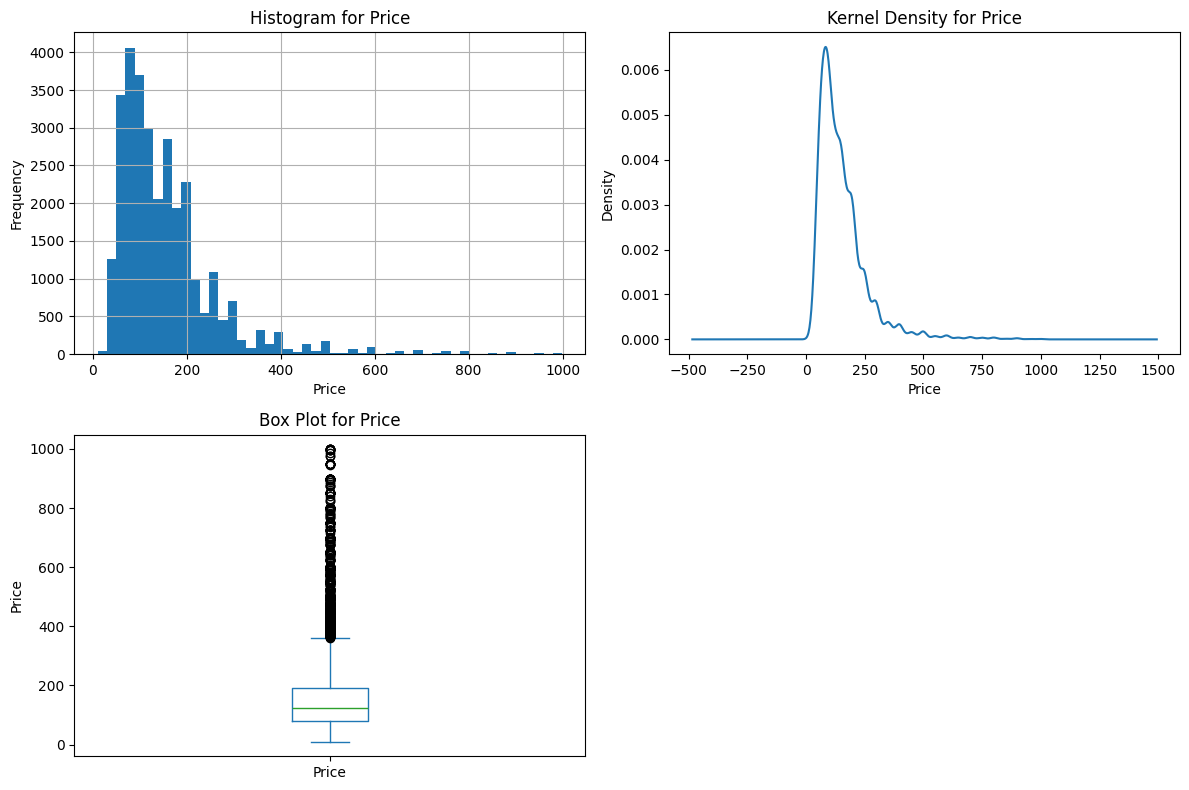

Original Price Statistical Description:
count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
25%         80.000000
50%        125.000000
75%        192.000000
max        999.000000
Name: Price, dtype: float64


In [12]:
# Cleaning Price
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df = df.dropna(subset=['Price'])

# Original Analysis 
plt.figure(figsize=(12, 8))

# Histogram
plt.subplot(221)
df['Price'].hist(bins=50)
plt.title('Histogram for Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Kernel Density
plt.subplot(222)
df['Price'].plot.kde()
plt.title('Kernel Density for Price')
plt.xlabel('Price')
plt.ylabel('Density')

# Box Plot
plt.subplot(223)
df['Price'].plot.box()
plt.title('Box Plot for Price')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

# Statistical Description
print("Original Price Statistical Description:")
print(df['Price'].describe())

4. Regarding the scaling of the data, most observations are concentrated at the lower end of the price range, while a few very high prices stretch the distribution. This indicates the data is not best scaled, as a small number of large values dominate the spread, making it harder to see patterns in the bulk of the data. Regarding Outliers, the box plot clearly shows several points far above the upper whisker, which are statistical outliers. These outliers inflate the variance and cause distortion.

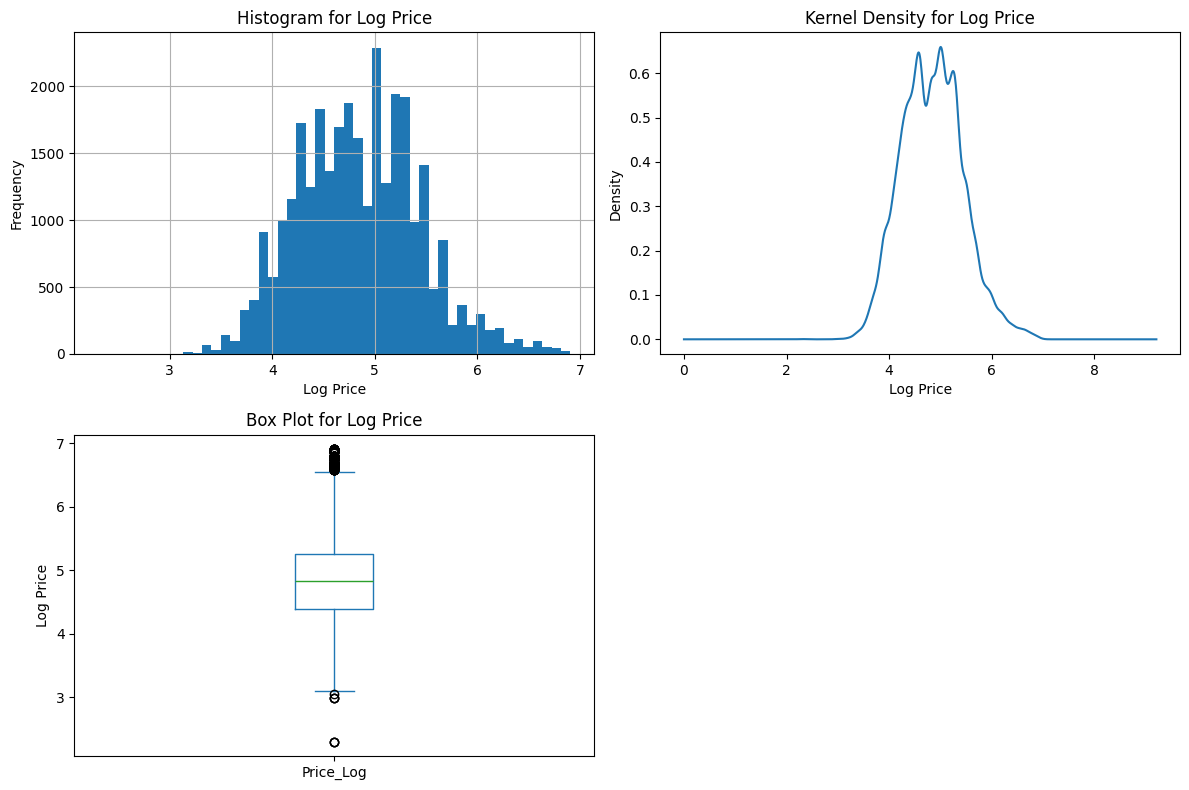


Log Price Statistical Description:
count    30297.000000
mean         4.845370
std          0.596999
min          2.302585
25%          4.382027
50%          4.828314
75%          5.257495
max          6.906755
Name: Price_Log, dtype: float64


In [13]:
# Analysis after Transformation

# Handle zero prices
df['Price'] = df['Price'].replace(0, 0.0001)
df['Price_Log'] = np.log(df['Price'])

plt.figure(figsize=(12, 8))

# Histogram of Log Prices
plt.subplot(221)
df['Price_Log'].hist(bins=50)
plt.title('Histogram for Log Price')
plt.xlabel('Log Price')
plt.ylabel('Frequency')

# Kernel Density of Log Prices
plt.subplot(222)
df['Price_Log'].plot.kde()
plt.title('Kernel Density for Log Price')
plt.xlabel('Log Price')
plt.ylabel('Density')

# Box Plot of Log Prices
plt.subplot(223)
df['Price_Log'].plot.box()
plt.title('Box Plot for Log Price')
plt.ylabel('Log Price')

plt.tight_layout()
plt.show()

# Statistical Description of Log Prices
print("\nLog Price Statistical Description:")
print(df['Price_Log'].describe())

5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.

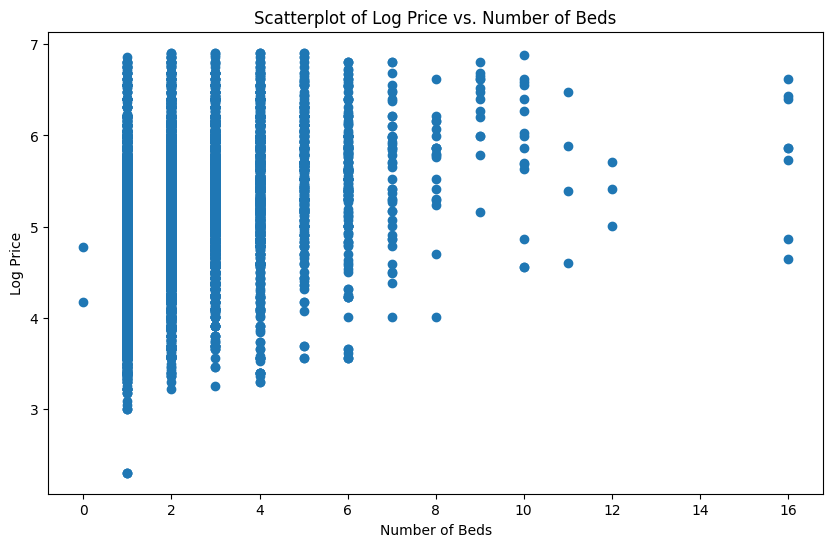


Description of Price Grouped by Number of Beds:
        count        mean         std    min     25%    50%     75%    max
Beds                                                                      
0.0       2.0   92.000000   38.183766   65.0   78.50   92.0  105.50  119.0
1.0   20307.0  124.757670   75.685752   10.0   75.00  100.0  155.00  950.0
2.0    6561.0  186.702332  115.044205   25.0  115.00  160.0  225.00  999.0
3.0    2029.0  234.928043  142.288189   26.0  140.00  200.0  299.00  999.0
4.0     766.0  280.554830  175.512312   27.0  150.00  240.0  363.75  999.0
5.0     274.0  322.000000  190.319415   35.0  186.00  285.0  425.00  995.0
6.0     166.0  316.313253  201.157585   35.0  183.75  271.0  399.00  900.0
7.0      45.0  341.377778  220.116631   55.0  177.00  300.0  445.00  900.0
8.0      20.0  331.850000  155.652202   55.0  218.75  339.5  408.75  750.0
9.0      14.0  587.142857  208.351721  175.0  423.75  625.0  750.00  900.0
10.0     15.0  442.200000  263.926992   95.0  287.0

In [16]:
# Clean Beds
df['Beds'] = pd.to_numeric(df['Beds'], errors='coerce')
df = df.dropna(subset=['Beds'])

# Handle zero prices
df['Price'] = df['Price'].replace(0, 0.0001)

# Log transform Price
df['Price_Log'] = np.log(df['Price'])

# Scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df['Beds'], df['Price_Log'])
plt.xlabel('Number of Beds')
plt.ylabel('Log Price')
plt.title('Scatterplot of Log Price vs. Number of Beds')
plt.show()

# Groupby Description
price_by_beds = df.groupby('Beds')['Price'].describe()
print("\nDescription of Price Grouped by Number of Beds:")
print(price_by_beds)

Looking at the scatterplot, we can see that there is a positive correlation between the number of beds and the log price. However, the relationship is general and not completely strong as there is a lot of variation between the data. Most of the data is concentrated between 1 and 7 beds.

Regarding the patterns in the average price, we can see that average price generally increases as the number of beds increases. For standard deviation in prices, the standard deviation of prices generally increases as well with the number of beds. So, for properties with more beds, the price variability is also higher. 

6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

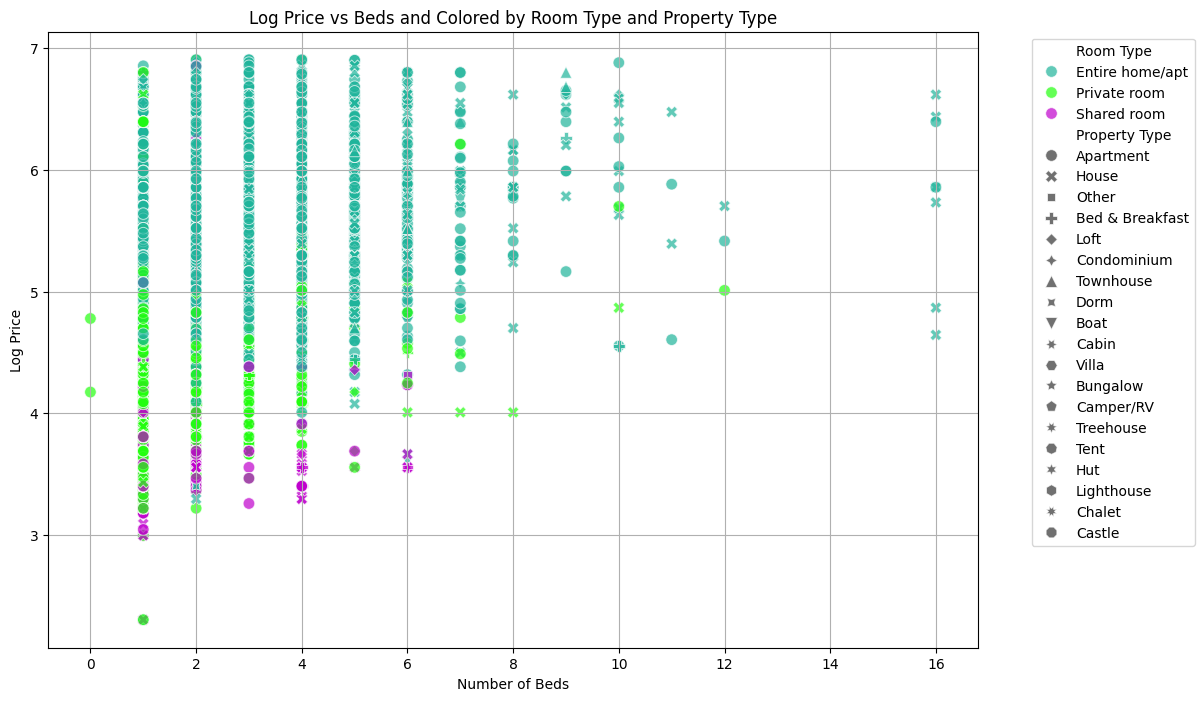


Description of Price Conditional on Room Type and Property Type:
                                   count        mean         std    min  \
Room Type       Property Type                                             
Entire home/apt Apartment        15521.0  200.188970  109.913339   10.0   
                Bed & Breakfast     13.0  184.538462  119.814172   85.0   
                Boat                 7.0  158.428571   51.110524  100.0   
                Bungalow             4.0  150.750000   46.464144   87.0   
                Cabin                1.0  250.000000         NaN  250.0   
                Camper/RV            6.0  114.333333  107.685963   45.0   
                Condominium         71.0  281.126761  175.313998   80.0   
                Dorm                 4.0   44.250000   24.060687   30.0   
                House              722.0  234.709141  159.842688   27.0   
                Lighthouse           1.0   39.000000         NaN   39.0   
                Loft              

In [23]:
plt.figure(figsize=(12, 8))

# Custom color palette for Room Type
custom_palette = {
    "Entire home/apt": "#1fb49b",
    "Private room": "#22ff0e",
    "Shared room": "#bf00cd"
}

sns.scatterplot(
    x='Beds',
    y='Price_Log',
    hue='Room Type',
    style='Property Type',
    data=df,
    alpha=0.7,
    s=70,
    palette=custom_palette
)

plt.xlabel('Number of Beds')
plt.ylabel('Log Price')
plt.title('Log Price vs Beds and Colored by Room Type and Property Type')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

price_by_room_prop = df.groupby(['Room Type', 'Property Type'])['Price'].describe()
print("\nDescription of Price Conditional on Room Type and Property Type:")
print(price_by_room_prop)


Regarding patterns on the scatter plot, we can see that entire homes and apartments generally have highest prices, private rooms come after, and shared rooms have the lowest prices. There is generally a positive correlation between bed count and log price. But, the correlation is stronger for certain types like Entire home/apt. 

On average, Entire home/apt has the highest average price for room type, and Loft and Condominium have the highest average prices for property type. Regarding standard deviation, Entire home/apt has the highest standard deviation for room type. Other and Loft have the highest standard deviation for property type. When comparing mean and median to be a more reliable estimate of central tendency, we can see that the median is more reliable. This is because the mean is inflated by few very high priced listings, while the median better reflects a typical listing for each category. In addition, many groups show that there are large differences between mean and median due to outliers and right-skewness.

**Q3.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.

In [26]:
# Load the dataset
df = pd.read_csv('/Users/calebkim7/eda_assignment/data/drilling_rigs.csv')

print(f"Number of observations: {df.shape[0]}")
print(f"Number of variables:  {df.shape[1]}")

Number of observations: 623
Number of variables:  10


Some columns are already numeric, while others wre read as object because they contained commas or non-numeric formatting. Cleaning will be needed for those variables. The commas need to be stripped and coerced to numeric.

2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.

In [35]:
# Convert Month to datetime
df['time'] = pd.to_datetime(df['Month'], format='mixed')


3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.

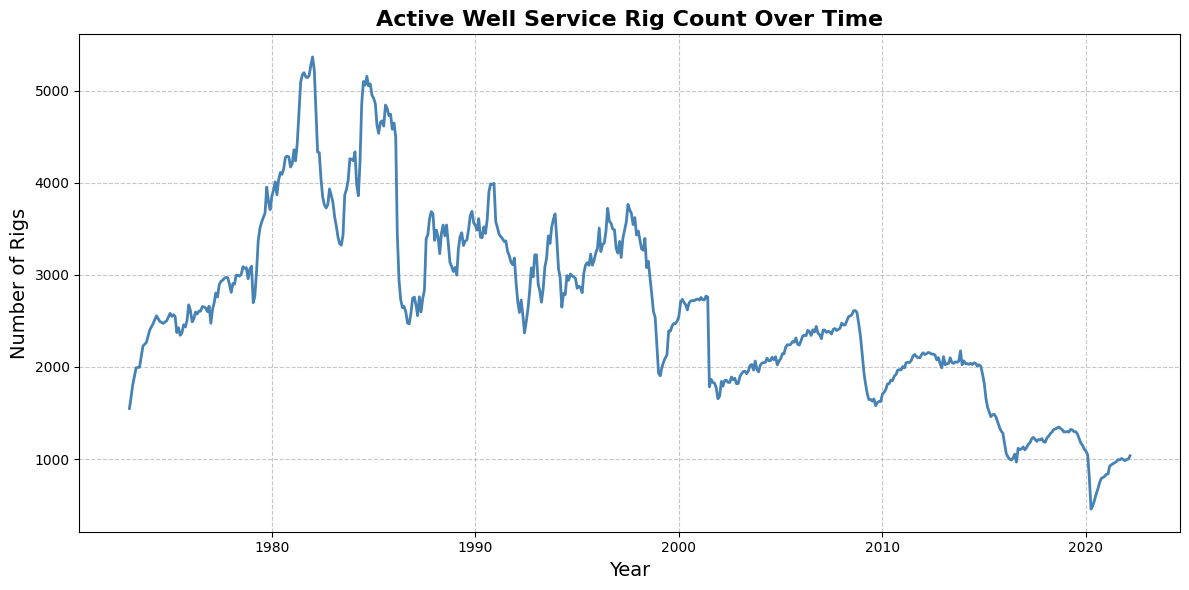

In [36]:
# Clean the column: remove commas and convert to numeric
df['Active Well Service Rig Count (Number of Rigs)'] = (
    pd.to_numeric(df['Active Well Service Rig Count (Number of Rigs)']
                  .astype(str)
                  .str.replace(',', ''), errors='coerce')
)

# Drop rows where rig count is missing
df = df.dropna(subset=['Active Well Service Rig Count (Number of Rigs)'])

# Plot
plt.figure(figsize=(12,6))
plt.plot(df['time'], df['Active Well Service Rig Count (Number of Rigs)'],
         color="steelblue", linewidth=2)

plt.title("Active Well Service Rig Count Over Time", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Rigs", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The line graph shows that the number of rigs rose greatly from the 1970s to the early 1980s. After this peak, it has been generally decreasing over time.

4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.

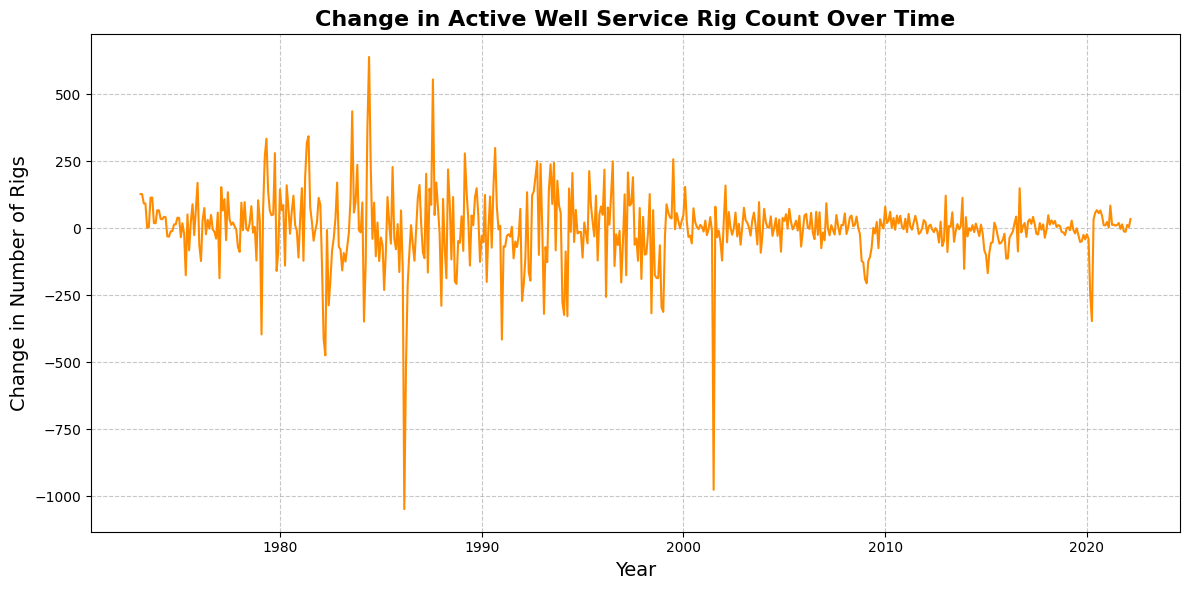

In [32]:
df['Rig_Count_Change'] = df['Active Well Service Rig Count (Number of Rigs)'].diff()

plt.figure(figsize=(12,6))
plt.plot(df['time'], df['Rig_Count_Change'], color="darkorange", linewidth=1.5)

plt.title("Change in Active Well Service Rig Count Over Time", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Change in Number of Rigs", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The graph fluctuates around 0. There are great downward spikes. The graph shows that changes are highly volatile with sudden jumps and drops.

5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

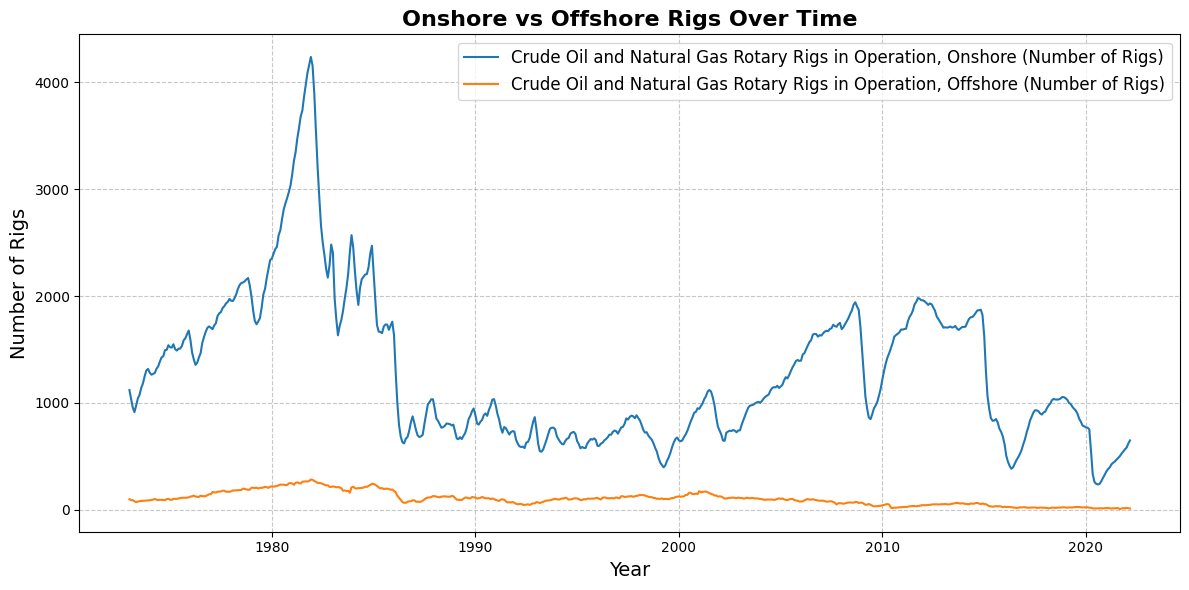

In [34]:
# Melt the first two columns
melted = df.melt(id_vars=['time'],
                 value_vars=df.columns[1:3],
                 var_name='Rig_Type',
                 value_name='Rig_Count')

# Plot
plt.figure(figsize=(12,6))
for rig_type in melted['Rig_Type'].unique():
    subset = melted[melted['Rig_Type'] == rig_type]
    plt.plot(subset['time'], subset['Rig_Count'], label=rig_type)

plt.title("Onshore vs Offshore Rigs Over Time", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Rigs", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
